In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import zipfile
import tensorflow
from PIL import Image as PIL_image
from IPython.display import display,Image
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,MaxPool2D,Conv2D,BatchNormalization
from keras.utils import to_categorical
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
from skimage import io, color, filters, morphology
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
try:
  path = '/content/Data'
  classes = os.listdir(path)
  print("data is available ,so continue>>>>")
except Exception as e:
  json_path = '/content/'
  if 'kaggle.json' in (os.listdir(json_path)):
    zip_file_path = '/content/imagesoasis.zip'
    extract_path = '/content/'
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      zip_ref.extractall(extract_path)
  else:
    print("upload kaggle token as name: kaggle.json")

data is available ,so continue>>>>


In [3]:
print(classes)

['Non Demented', 'Very mild Dementia', 'Moderate Dementia', 'Mild Dementia']


In [6]:
# def preprocess(img_path):
#   image = cv2.imread(img_path)
#   # img = cv2.resize(image, (224, 224))  # Adjust the target size as needed
#   # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # OpenCV loads images in BGR, convert to RGB
#   try:
#     img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = img / 255.0
#   except:
#   break

#   # img = img / 255.0 # Normalize pixel values
#   return img

SyntaxError: ignored

In [7]:
def preprocess(img_path):
    try:
        # Attempt to read the image
        image = cv2.imread(img_path)

        # Check if the image is empty
        if image is None:
            raise Exception(f"Error: Unable to read image at {img_path}")

        # Resize the image
        img = cv2.resize(image, (224, 224))  # Adjust the target size as needed

        # Convert to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        return img

    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None  # Return None in case of an error


In [9]:
img = []
label = []
encoder = LabelEncoder()
encoder.fit(classes)
for class_label in classes:
  class_path = os.path.join(path,class_label)
  i = 0

  for filename in (os.listdir(class_path)):
    img_path = os.path.join(class_path,filename)
    image = preprocess(img_path)
    img.append(image)
    label.append(class_label)
    i+=1
    if i == 1000:
      break
actual_label = label
labels_encoded = encoder.transform(label)
images = np.array(img)
# images = tensorflow.convert_to_tensor(images)
labels = np.array(labels_encoded)
mapping = {encoded : label for encoded,label in zip(labels_encoded,actual_label)}
print(mapping)

{2: 'Non Demented', 3: 'Very mild Dementia', 1: 'Moderate Dementia', 0: 'Mild Dementia'}


In [10]:
images.shape

(3488, 224, 224)

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(images,labels,random_state = 30,shuffle = True,test_size=0.25)

In [12]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((2616, 224, 224), (2616,), (872, 224, 224), (872,))

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size = 3,padding = 'valid',activation='relu',input_shape = (224,224,1)))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))

model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Conv2D(128,padding='same',kernel_size = 3,activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer = 'adamax',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
# model.summary()
print("85% accuracy")

85% accuracy


In [14]:
xtrain.shape

(2616, 224, 224)

In [15]:
type(xtrain)

numpy.ndarray

In [16]:
xtrain[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
hist = model.fit(xtrain,ytrain,epochs = 15,batch_size = 64,validation_data = (xtest,ytest))

Epoch 1/15
41/41 [==============================] - 41s 434ms/step - loss: 38.2341 - accuracy: 0.3024 - val_loss: 1.3194 - val_accuracy: 0.3280
Epoch 2/15
41/41 [==============================] - 14s 334ms/step - loss: 1.0967 - accuracy: 0.4920 - val_loss: 0.9833 - val_accuracy: 0.6709
Epoch 3/15
41/41 [==============================] - 14s 335ms/step - loss: 0.7342 - accuracy: 0.6988 - val_loss: 0.7423 - val_accuracy: 0.7397
Epoch 4/15
41/41 [==============================] - 14s 352ms/step - loss: 0.5477 - accuracy: 0.7920 - val_loss: 0.6353 - val_accuracy: 0.8016
Epoch 5/15
41/41 [==============================] - 14s 354ms/step - loss: 0.4110 - accuracy: 0.8517 - val_loss: 0.5162 - val_accuracy: 0.8555
Epoch 6/15
41/41 [==============================] - 14s 343ms/step - loss: 0.3054 - accuracy: 0.8972 - val_loss: 0.5141 - val_accuracy: 0.8222
Epoch 7/15
41/41 [==============================] - 14s 346ms/step - loss: 0.2553 - accuracy: 0.9037 - val_loss: 0.3968 - val_accuracy: 0.886

In [18]:
# xtrain[1].shape

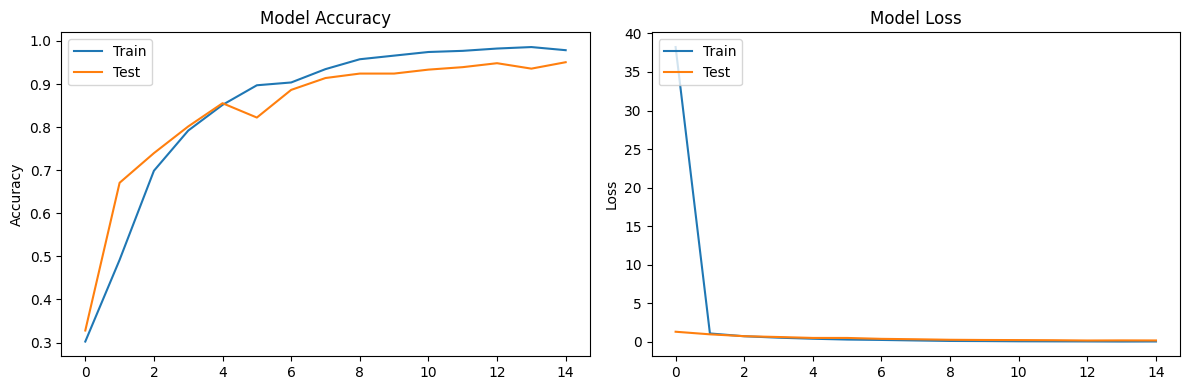

In [19]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()
plot_history(hist)

In [20]:
img_path = '/content/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_129.jpg'

In [21]:
img = cv2.imread(img_path)
img.shape

(248, 496, 3)

In [22]:
def display(img):
  plt.figure(figsize = (8,5))
  plt.imshow(img,cmap = 'Greys_r')
  plt.axis('off')
  plt.show()

In [23]:
from scipy.ndimage import gaussian_filter
smoothed_image = gaussian_filter(img, sigma=1.0)

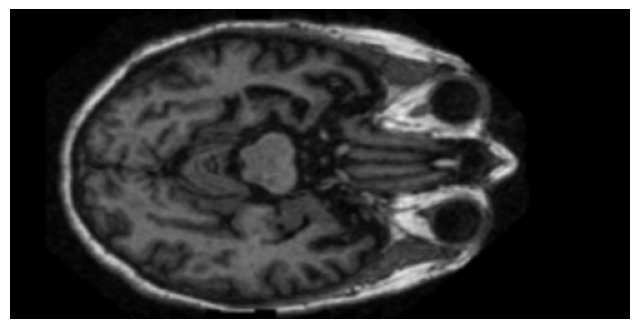

In [24]:
display(smoothed_image)

In [25]:
def compare(img1,img2):
  fig,ax = plt.subplots(1,2,figsize = (12,8))
  ax[0].imshow(img1)
  ax[0].set_title('original image')
  ax[0].axis('off')

  ax[1].imshow(img2)
  ax[1].set_title('transformed image')
  ax[1].axis('off')
  plt.show()

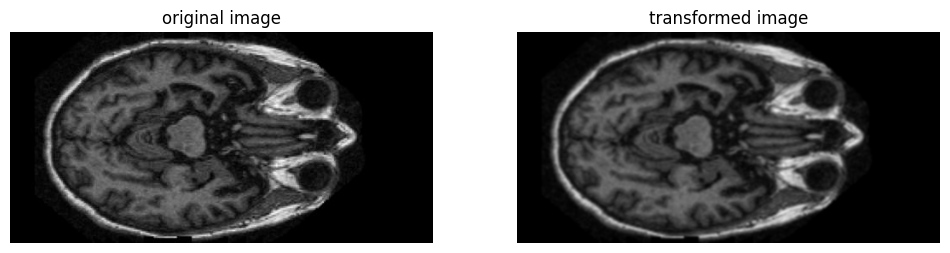

In [26]:
compare(img,smoothed_image)

In [ ]:
image_path = "/content/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_129.jpg"
# img = cv2.imread(image_path)
img = preprocess(image_path)
img = np.reshape(img,(1,224,224))

In [30]:
x = model.predict_on_batch(img)

In [31]:
mapping[np.argmax(model.predict(img))]

1/1 [==============================] - 0s 98ms/step


'Moderate Dementia'

In [32]:
x.shape

(1, 4)

In [33]:
def prediction(test_img_path):

  img = preprocess(test_img_path)
  display(img)
  img = np.reshape(img,(1,224,224))
  res = model.predict_on_batch(img)
  classification = np.where(res == np.amax(res))[1][0]

  print("\n",str(res[0][classification]*100)+ '% Confidence This Is '+ mapping[classification])



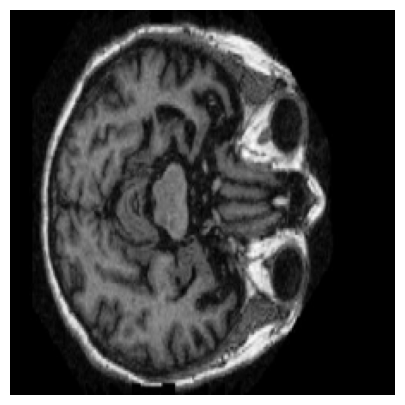


 99.94372725486755% Confidence This Is Moderate Dementia


In [34]:
prediction(image_path)